In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
# from webdriver_manager.chrome import ChromeDriverManager
import time
import pyperclip

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [24]:
result_pasta = pd.DataFrame(result01)
result_pasta

,0,1,2,3
0,wonyyday_,#마요네즈불고기파스타레시피 업로드 완료🍝오늘 수업 메뉴 테스트하다가 마요네즈가 눈에...,"[#마요네즈불고기파스타레시피, #마요네즈불고기파스타]",1368
1,jmpsehanx,@chef_seokdeok안녕하세요. 이태리에서 🏫요리학교를 나와 지금까지 이태리 ...,"[#파스타, #생면파스타, #연남맛집, #연남동맛집, #홍대맛집, #연트럴파크맛집,...",147
2,jo.a_menu,#조아_메뉴주말엔 왠지 요리가 더 하기 싫어지는 마음...그냥 주말엔 편하게 대-충...,"[#조아_메뉴주말엔, #식단일기, #다이어트식단레시피-]",1534
3,mari_mukkkkk,신당동 맛집 찾으시면 여기로 들어오세요문래동에서 애정하던 양키스그릴이 신당동에도 생...,"[#양키스그릴, #신당동맛집, #왕십리맛집, #을지로맛집, #동대문맛집, #동묘맛집...",213
4,yyoasdmfk0214,@chef_seokdeok안녕하세요. 이태리에서 🏫요리학교를 나와 지금까지 이태리 ...,"[#파스타, #생면파스타, #연남맛집, #연남동맛집, #홍대맛집, #연트럴파크맛집,...",149
...,...,...,...,...
992,dalcongsfm,🌝애들은 먼저 주고퇴근해서 온 남편이랑 나랑 따로 먹은 저녁ㅎ오꼬노미야끼를 애들먹었...,"[#해물로제파스타, #명란파스타땡초넣고, #유아식, #유아식단, #어린이식단, #식...",63
993,viudnie,🫠이틀동안의 먹부림🫡하나같이 다 맛있어서 너무 행복행🫶이 행복이 같이 있으면 두 배...,[],25
994,hwangdayun71,츄릅.. 맛있겠다#엄마 생신 #파스타 #맛있었다,"[#엄마, #파스타, #맛있었다]",1
995,myfoodrecords_,💙 여수: 포트타운 다이닝- 주소: 전남 여수시 웅천남4로 17 2층- 영업시간: ...,[],23


In [30]:
result_pasta.to_csv("./data/result_pasta.csv")   # 1000개

## 파스타 1000개

In [3]:
# 크롤링 데이터 저장 후 불러오기

pasta=pd.read_csv("./data/result_pasta.csv", index_col = 0)
pasta.head()

,0,1,2,3
0,wonyyday_,#마요네즈불고기파스타레시피 업로드 완료🍝오늘 수업 메뉴 테스트하다가 마요네즈가 눈에...,"['#마요네즈불고기파스타레시피', '#마요네즈불고기파스타']",1368
1,jmpsehanx,@chef_seokdeok안녕하세요. 이태리에서 🏫요리학교를 나와 지금까지 이태리 ...,"['#파스타', '#생면파스타', '#연남맛집', '#연남동맛집', '#홍대맛집',...",147
2,jo.a_menu,#조아_메뉴주말엔 왠지 요리가 더 하기 싫어지는 마음...그냥 주말엔 편하게 대-충...,"['#조아_메뉴주말엔', '#식단일기', '#다이어트식단레시피-']",1534
3,mari_mukkkkk,신당동 맛집 찾으시면 여기로 들어오세요문래동에서 애정하던 양키스그릴이 신당동에도 생...,"['#양키스그릴', '#신당동맛집', '#왕십리맛집', '#을지로맛집', '#동대문...",213
4,yyoasdmfk0214,@chef_seokdeok안녕하세요. 이태리에서 🏫요리학교를 나와 지금까지 이태리 ...,"['#파스타', '#생면파스타', '#연남맛집', '#연남동맛집', '#홍대맛집',...",149


In [4]:
pasta.columns = ["UserId", "Contents", "Tags", "Like"]
pasta.head()

,UserId,Contents,Tags,Like
0,wonyyday_,#마요네즈불고기파스타레시피 업로드 완료🍝오늘 수업 메뉴 테스트하다가 마요네즈가 눈에...,"['#마요네즈불고기파스타레시피', '#마요네즈불고기파스타']",1368
1,jmpsehanx,@chef_seokdeok안녕하세요. 이태리에서 🏫요리학교를 나와 지금까지 이태리 ...,"['#파스타', '#생면파스타', '#연남맛집', '#연남동맛집', '#홍대맛집',...",147
2,jo.a_menu,#조아_메뉴주말엔 왠지 요리가 더 하기 싫어지는 마음...그냥 주말엔 편하게 대-충...,"['#조아_메뉴주말엔', '#식단일기', '#다이어트식단레시피-']",1534
3,mari_mukkkkk,신당동 맛집 찾으시면 여기로 들어오세요문래동에서 애정하던 양키스그릴이 신당동에도 생...,"['#양키스그릴', '#신당동맛집', '#왕십리맛집', '#을지로맛집', '#동대문...",213
4,yyoasdmfk0214,@chef_seokdeok안녕하세요. 이태리에서 🏫요리학교를 나와 지금까지 이태리 ...,"['#파스타', '#생면파스타', '#연남맛집', '#연남동맛집', '#홍대맛집',...",149


In [5]:
## 워드 클라우드 생성을 위한 패키지
from wordcloud import WordCloud
## 워드클라우드 모양을 변형시키고자 하는 이미지 활용에 사용 패키지
from PIL import Image
## 그래프 출력 패키지
import matplotlib.pyplot as plt
## 수치 연산 패키지
import numpy as np
## 데이터 핸들링
import pandas as pd

In [6]:
import time
from tqdm import tqdm_notebook

content_all = ''
for i in tqdm_notebook(range(len(pasta["Contents"]))):
    content_all = content_all + ' ' + pasta["Contents"].loc[i]

C:\Users\acorn\AppData\Local\Temp\ipykernel_10164\677517556.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(pasta["Contents"]))):


  0%|          | 0/997 [00:00<?, ?it/s]

In [7]:
import re
content_all = re.sub('[^ㄱ-ㅣ가-힣 ]',"",content_all)
content_all

' 마요네즈불고기파스타레시피 업로드 완료오늘 수업 메뉴 테스트하다가 마요네즈가 눈에 보여서 급 만들어 본 마요네즈불고기파스타 입니당마요네즈 러버라 실패는 없겠지 했지만 혹시나 두근거리는 마음으로 만들었는데 역시나 맛있었어요 마요네즈는 정말 완벽한 것 같아요다른 토핑도 맛있나요 물어보실 수 있는데 개인적으로 불고기가 가장 잘 어울릴 것 같아요오리엔탈파스타맛 알리오올리오맛 약간의 크림맛이 더해져서 풍미 잔뜩 파스타였답니다 마요네즈불고기파스타 레시피가 궁금하다면 프로필링크 블로그를 클릭해주세요 안녕하세요 이태리에서 요리학교를 나와 지금까지 이태리 요리를 공부하고 있는  셰프 이석덕입니다매일매일 롱숏 생면 파스타를 뽑고 있으며 보통의 파스타집에서 요리하는 건면은 절대 사용하지 않습니다 건면은 생면에 비해 품질이 떨어지고 신선하지 않기에 저는 오로지 이태리 남부와 북부 시칠리아지역 스타일의 건강하고 신선한 생면만을 고집하여 최고의 생면파스타를 만들고자 합니다 또한 보통 생면을 사용한 요리는 만원대의 가격으로 판매되지만 이석덕셰프는 정직한 장사 마인드를 가지고 원에서 원의 가격으로 판매하고 있습니다 생면파스타를 만든다는 자부심을 가지고 이태리 현지에서 공수한 고급 재료와 국내의 신선한 재료로 정성을 다해 만들고 있습니다 검증된 프로그램인  생생정보회회 모닝와이드 회 금요면탐정  생방송투데이 먹킷리스트  출연하였으며 모두 방송국의 요청을 받아 촬영했습니다 이태리 전통메뉴를 고집하며 끊임없이 배우고 공부하여 자부심을 가지고 최고의 생면파스타를 만들겠습니다감사합니다생면연질밀카푸토계란반죽원듀럼밀세몰리나물반죽원 선택해주세요 롱파스타  면에 따라  다릅니다 인분 물반죽원  계란반죽원 스파게티 원  원 탈리아텔레 원 레지네테 원 페투치네 원 부가티니 원 탈리올리니 원 타야린계란반죽원키타라물계란반죽원원 숏파스타   인분 물반죽 원 계란반죽원 먹물갈레티 원  원 리가토니 원오레키에테 원파케리 원콘킬리에 원카사레체 원푸질리 원카바델리원색깔면 롱숏파스타  롱원 인분  숏원 인분 먹물비트시금

In [8]:
from konlpy.tag import Okt
okt = Okt()
nouns_txt = okt.nouns(content_all)
nouns_txt

['마요네즈',
 '불고기',
 '파스타',
 '레시피',
 '업로드',
 '완료',
 '오늘',
 '수업',
 '메뉴',
 '테스트',
 '마요네즈',
 '눈',
 '보',
 '급',
 '마요네즈',
 '불고기',
 '파스타',
 '마요네즈',
 '러버',
 '실패',
 '혹시',
 '마음',
 '역시',
 '마요네즈',
 '정말',
 '것',
 '다른',
 '토핑',
 '수',
 '개인',
 '불고기',
 '가장',
 '것',
 '오리',
 '탈',
 '파스타',
 '맛',
 '알리오',
 '리오',
 '맛',
 '약간',
 '크림',
 '맛',
 '잔뜩',
 '파스타',
 '마요네즈',
 '불고기',
 '파스타',
 '레시피',
 '프로필',
 '링크',
 '블로그',
 '클릭',
 '이태리',
 '요리',
 '학교',
 '지금',
 '이태리',
 '요리',
 '공부',
 '셰프',
 '덕',
 '매일',
 '매일',
 '롱숏',
 '생면',
 '파스타',
 '보통',
 '파스타',
 '집',
 '요리',
 '건',
 '은',
 '절대',
 '사용',
 '건',
 '은',
 '생면',
 '품질',
 '저',
 '이태리',
 '남부',
 '북부',
 '시칠리아',
 '지역',
 '스타일',
 '생면',
 '고집',
 '최고',
 '생면',
 '파스타',
 '또한',
 '보통',
 '생면',
 '사용',
 '요리',
 '만원',
 '대의',
 '가격',
 '판매',
 '덕',
 '셰프',
 '장사',
 '마인드',
 '가지',
 '원',
 '원',
 '가격',
 '판매',
 '생면',
 '파스타',
 '자부심',
 '가지',
 '이태리',
 '현지',
 '공수',
 '고급',
 '재료',
 '국내',
 '재료',
 '정성',
 '다해',
 '검증',
 '프로그램',
 '생생',
 '정보',
 '회회',
 '모닝와이드',
 '회',
 '금',
 '요면',
 '탐정',
 '생방송투데이',
 '먹킷',
 '리스트',
 '출연',
 '모두',
 '방송국',
 '요청

In [9]:
from collections import Counter
count = Counter(nouns_txt)
count
rank_text = count.most_common()
rank_text

[('파스타', 2856),
 ('맛집', 2705),
 ('생면', 805),
 ('원', 676),
 ('연남동', 593),
 ('피자', 528),
 ('그램', 507),
 ('스타', 455),
 ('스테이크', 418),
 ('요리', 396),
 ('트러플', 391),
 ('메뉴', 378),
 ('치즈', 369),
 ('와인', 352),
 ('덕', 334),
 ('점', 313),
 ('주문', 305),
 ('크림', 294),
 ('볼', 266),
 ('데이트', 252),
 ('맛', 250),
 ('이탈리아', 248),
 ('반죽', 243),
 ('소스', 233),
 ('인분', 220),
 ('샐러드', 217),
 ('카페', 214),
 ('연남', 212),
 ('이태리', 195),
 ('오늘', 190),
 ('층', 180),
 ('스파게티', 179),
 ('음식', 176),
 ('수', 174),
 ('신촌', 167),
 ('구', 165),
 ('곳', 164),
 ('시', 163),
 ('출연', 159),
 ('레몬', 157),
 ('토마토', 154),
 ('서비스', 152),
 ('토', 150),
 ('가격', 148),
 ('제', 148),
 ('포', 148),
 ('사용', 141),
 ('광주', 141),
 ('매일', 139),
 ('오일', 139),
 ('방문', 138),
 ('알라', 138),
 ('추천', 137),
 ('서울시', 137),
 ('파', 132),
 ('홍대', 132),
 ('라자냐', 130),
 ('피가로', 128),
 ('운', 127),
 ('뇨끼', 125),
 ('만원', 124),
 ('시간', 122),
 ('파스', 121),
 ('라비올리', 119),
 ('점심', 119),
 ('시칠리아', 116),
 ('케리', 116),
 ('예약', 113),
 ('핫', 112),
 ('맞팔', 110),
 ('페스', 108),

In [10]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from konlpy.tag import Okt
from konlpy.corpus import kolaw
import nltk
from wordcloud import WordCloud

(-0.5, 399.5, 199.5, -0.5)

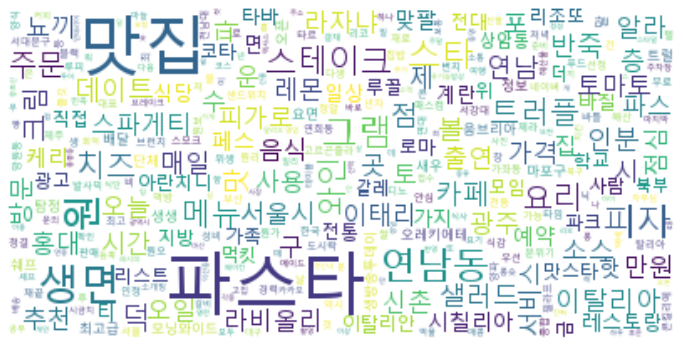

In [11]:
pasta_wc = WordCloud(max_font_size=40, background_color="white", max_words=1000,
               font_path="C:\\Windows\\Fonts\\malgun.ttf").generate_from_frequencies(dict(rank_text))

plt.figure(figsize=(12,12))
plt.imshow(pasta_wc, interpolation="bilinear")
plt.axis("off")

## 전처리1 
- Contents 특수기호 및 문자 제거
- Tags #을 제외한 특수 기호 제거

In [55]:
pasta_1 = pasta.copy()

In [56]:
pasta_1.head()

,UserId,Contents,Tags,Like
0,wonyyday_,#마요네즈불고기파스타레시피 업로드 완료🍝오늘 수업 메뉴 테스트하다가 마요네즈가 눈에...,"['#마요네즈불고기파스타레시피', '#마요네즈불고기파스타']",1368
1,jmpsehanx,@chef_seokdeok안녕하세요. 이태리에서 🏫요리학교를 나와 지금까지 이태리 ...,"['#파스타', '#생면파스타', '#연남맛집', '#연남동맛집', '#홍대맛집',...",147
2,jo.a_menu,#조아_메뉴주말엔 왠지 요리가 더 하기 싫어지는 마음...그냥 주말엔 편하게 대-충...,"['#조아_메뉴주말엔', '#식단일기', '#다이어트식단레시피-']",1534
3,mari_mukkkkk,신당동 맛집 찾으시면 여기로 들어오세요문래동에서 애정하던 양키스그릴이 신당동에도 생...,"['#양키스그릴', '#신당동맛집', '#왕십리맛집', '#을지로맛집', '#동대문...",213
4,yyoasdmfk0214,@chef_seokdeok안녕하세요. 이태리에서 🏫요리학교를 나와 지금까지 이태리 ...,"['#파스타', '#생면파스타', '#연남맛집', '#연남동맛집', '#홍대맛집',...",149


In [57]:
pasta_1["Contents"] = pasta_1["Contents"].str.replace(pat=r'[^\w]', repl=r' ', regex=True)
pasta_1["Tags"] = pasta_1["Tags"].str.strip("]['")
pasta_1["Tags"] = pasta_1["Tags"].str.replace("'", repl=r"", regex=True)

In [58]:
pasta_1.head()

,UserId,Contents,Tags,Like
0,wonyyday_,마요네즈불고기파스타레시피 업로드 완료 오늘 수업 메뉴 테스트하다가 마요네즈가 눈에...,"#마요네즈불고기파스타레시피, #마요네즈불고기파스타",1368
1,jmpsehanx,chef_seokdeok안녕하세요 이태리에서 요리학교를 나와 지금까지 이태리 ...,"#파스타, #생면파스타, #연남맛집, #연남동맛집, #홍대맛집, #연트럴파크맛집, ...",147
2,jo.a_menu,조아_메뉴주말엔 왠지 요리가 더 하기 싫어지는 마음 그냥 주말엔 편하게 대 충...,"#조아_메뉴주말엔, #식단일기, #다이어트식단레시피-",1534
3,mari_mukkkkk,신당동 맛집 찾으시면 여기로 들어오세요문래동에서 애정하던 양키스그릴이 신당동에도 생...,"#양키스그릴, #신당동맛집, #왕십리맛집, #을지로맛집, #동대문맛집, #동묘맛집,...",213
4,yyoasdmfk0214,chef_seokdeok안녕하세요 이태리에서 요리학교를 나와 지금까지 이태리 ...,"#파스타, #생면파스타, #연남맛집, #연남동맛집, #홍대맛집, #연트럴파크맛집, ...",149


## 전처리2
- Contents에서 연관성 높은 키워드 포함된 행 추출
- Like 정규화 및 평균 이하 제거

##### 연관성 키워드 포함 행 추출

In [60]:
pasta_1 = pasta_1[pasta_1["Contents"].str.contains(r"협찬|광고|추천|맛집|그램|이태리|이탈리아|파스타")]

In [64]:
pasta_1.reset_index(drop=True, inplace=True)

In [65]:
like = pasta_1["Like"].copy()

In [66]:
like = pd.DataFrame(like)

##### Like 정규화

In [67]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxcaler객체 생성
scaler = MinMaxScaler()

# MinMaxScaler 로 데이터 셋 변환 .fit() 과 .transform() 호출.  
scaler.fit(like)
like_scaled = scaler.transform(like)

# transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
Like_scaled = pd.DataFrame(data=like_scaled)

In [68]:
Like_scaled.columns=["like_scale"]
Like_scaled.head()

,like_scale
0,0.891786
1,0.095828
2,1.000000
3,0.138853
4,0.097132


In [69]:
pasta_1.drop(["Like"],axis=1, inplace=True)

In [72]:
pasta_scaled = pd.concat([pasta_1, Like_scaled],axis=1)
pasta_scaled.head()

,UserId,Contents,Tags,like_scale
0,wonyyday_,마요네즈불고기파스타레시피 업로드 완료 오늘 수업 메뉴 테스트하다가 마요네즈가 눈에...,"#마요네즈불고기파스타레시피, #마요네즈불고기파스타",0.891786
1,jmpsehanx,chef_seokdeok안녕하세요 이태리에서 요리학교를 나와 지금까지 이태리 ...,"#파스타, #생면파스타, #연남맛집, #연남동맛집, #홍대맛집, #연트럴파크맛집, ...",0.095828
2,jo.a_menu,조아_메뉴주말엔 왠지 요리가 더 하기 싫어지는 마음 그냥 주말엔 편하게 대 충...,"#조아_메뉴주말엔, #식단일기, #다이어트식단레시피-",1.000000
3,mari_mukkkkk,신당동 맛집 찾으시면 여기로 들어오세요문래동에서 애정하던 양키스그릴이 신당동에도 생...,"#양키스그릴, #신당동맛집, #왕십리맛집, #을지로맛집, #동대문맛집, #동묘맛집,...",0.138853
4,yyoasdmfk0214,chef_seokdeok안녕하세요 이태리에서 요리학교를 나와 지금까지 이태리 ...,"#파스타, #생면파스타, #연남맛집, #연남동맛집, #홍대맛집, #연트럴파크맛집, ...",0.097132


In [145]:
pasta_scaled

,UserId,Contents,Tags,like_scale
0,wonyyday_,마요네즈불고기파스타레시피 업로드 완료 오늘 수업 메뉴 테스트하다가 마요네즈가 눈에...,"#마요네즈불고기파스타레시피, #마요네즈불고기파스타",0.891786
1,jmpsehanx,chef_seokdeok안녕하세요 이태리에서 요리학교를 나와 지금까지 이태리 ...,"#파스타, #생면파스타, #연남맛집, #연남동맛집, #홍대맛집, #연트럴파크맛집, ...",0.095828
2,jo.a_menu,조아_메뉴주말엔 왠지 요리가 더 하기 싫어지는 마음 그냥 주말엔 편하게 대 충...,"#조아_메뉴주말엔, #식단일기, #다이어트식단레시피-",1.000000
3,mari_mukkkkk,신당동 맛집 찾으시면 여기로 들어오세요문래동에서 애정하던 양키스그릴이 신당동에도 생...,"#양키스그릴, #신당동맛집, #왕십리맛집, #을지로맛집, #동대문맛집, #동묘맛집,...",0.138853
4,yyoasdmfk0214,chef_seokdeok안녕하세요 이태리에서 요리학교를 나와 지금까지 이태리 ...,"#파스타, #생면파스타, #연남맛집, #연남동맛집, #홍대맛집, #연트럴파크맛집, ...",0.097132
...,...,...,...,...
815,ykhwa82,점심 점심메뉴 방학중 친구랑 파스타 스테이크 샐러드 피자에 청량고추 야미야미 너...,"#점심, #점심메뉴, #방학중, #친구랑, #파스타, #스테이크, #샐러드, #피자...",0.007171
816,wonju.dennis.lee,대구 나들이 일상 서양면옥 맛집 맛스타그램 파스타 장조림파스타 신세계 백화점 쇼핑,"#대구, #나들이, #일상, #서양면옥, #맛집, #맛스타그램, #파스타, #장조림...",0.012386
817,dalcongsfm,애들은 먼저 주고퇴근해서 온 남편이랑 나랑 따로 먹은 저녁ㅎ오꼬노미야끼를 애들먹었...,"#해물로제파스타, #명란파스타땡초넣고, #유아식, #유아식단, #어린이식단, #식판...",0.041069
818,hwangdayun71,츄릅 맛있겠다 엄마 생신 파스타 맛있었다,"#엄마, #파스타, #맛있었다",0.000652


In [80]:
avg = Like_scaled.sum()/len(Like_scaled)
avg

like_scale    0.041736
dtype: float64

In [151]:
pasta_scaled_avg = pasta_scaled[pasta_scaled["like_scale"]>0.041736]

In [152]:
pasta_scaled_avg.reset_index(drop=True, inplace=True)

In [153]:
pasta_scaled_avg       #237개

,UserId,Contents,Tags,like_scale
0,wonyyday_,마요네즈불고기파스타레시피 업로드 완료 오늘 수업 메뉴 테스트하다가 마요네즈가 눈에...,"#마요네즈불고기파스타레시피, #마요네즈불고기파스타",0.891786
1,jmpsehanx,chef_seokdeok안녕하세요 이태리에서 요리학교를 나와 지금까지 이태리 ...,"#파스타, #생면파스타, #연남맛집, #연남동맛집, #홍대맛집, #연트럴파크맛집, ...",0.095828
2,jo.a_menu,조아_메뉴주말엔 왠지 요리가 더 하기 싫어지는 마음 그냥 주말엔 편하게 대 충...,"#조아_메뉴주말엔, #식단일기, #다이어트식단레시피-",1.000000
3,mari_mukkkkk,신당동 맛집 찾으시면 여기로 들어오세요문래동에서 애정하던 양키스그릴이 신당동에도 생...,"#양키스그릴, #신당동맛집, #왕십리맛집, #을지로맛집, #동대문맛집, #동묘맛집,...",0.138853
4,yyoasdmfk0214,chef_seokdeok안녕하세요 이태리에서 요리학교를 나와 지금까지 이태리 ...,"#파스타, #생면파스타, #연남맛집, #연남동맛집, #홍대맛집, #연트럴파크맛집, ...",0.097132
...,...,...,...,...
232,kiwisorbet,seoulsausage kalbi pork pasta seoulsausag...,"#seoulsausage, #갈비소세지, #pasta, #fusillicortibu...",0.104954
233,kwonyul16,인사드립니다 드디어 오랜기간 준비한 파스타앤우 중랑초점 오픈 일정이 정해졌습니다 ...,"#파스타앤우중랑초점, #파스타앤우, #파스타, #필라프, #마라짬뽕우동, #김치우동...",0.076923
234,nolgomuk.go,큐브스테이크랑 쉬림프 오일파스타 야식은 역시나 푸짐하게 스테이크 ...,"#스테이크, #파스타, #저녁식사, #야식, #먹방, #다이어트, #다이어트식단, ...",0.058670
235,luv.nyommy,제일 좋아하는 명란오일파스타 명란오일파스타 파스타 먹방 먹보 ...,"#명란오일파스타, #파스타, #먹방, #먹보, #냠냠, #선팔, #맞팔, #첫줄, ...",0.128422


## 파스타 2000개

In [154]:
# 크롤링 데이터 저장 후 불러오기

pasta2=pd.read_csv("./data/result_pasta2.csv", index_col = 0)
pasta2.head()

,0,1,2,3
0,stb.0709.72yq,@chef_seokdeok안녕하세요. 이태리에서 🏫요리학교를 나와 지금까지 이태리 ...,"['#파스타', '#생면파스타', '#연남맛집', '#연남동맛집', '#홍대맛집',...",153
1,jo.a_menu,#조아_메뉴주말엔 왠지 요리가 더 하기 싫어지는 마음...그냥 주말엔 편하게 대-충...,"['#조아_메뉴주말엔', '#식단일기', '#다이어트식단레시피-']",1641
2,___foodtour,"젤리 동파육에 홈런볼 탕수육,, 대학로 신상 맛집 떳어요. #혜화#해피니스이름처럼 ...","['#혜화', '#해피니스이름처럼', '#투어_혜화']",66
3,zeoanaoa__.vva,@chef_seokdeok안녕하세요. 이태리에서 🏫요리학교를 나와 지금까지 이태리 ...,"['#파스타', '#생면파스타', '#연남맛집', '#연남동맛집', '#홍대맛집',...",138
4,mukggiri,세상에서 제일 맛있는 별이다.넘나 귀욤뽀짝한 별이 미트볼 위에서웃고있어용;; 부드러...,"['#헤이죠지', '#먹끼리_마포', '#홍대맛집', '#홍대맛집추천', '#홍대파...",738


In [155]:
pasta2.columns = ["UserId", "Contents", "Tags", "Like"]
pasta2.head()

,UserId,Contents,Tags,Like
0,stb.0709.72yq,@chef_seokdeok안녕하세요. 이태리에서 🏫요리학교를 나와 지금까지 이태리 ...,"['#파스타', '#생면파스타', '#연남맛집', '#연남동맛집', '#홍대맛집',...",153
1,jo.a_menu,#조아_메뉴주말엔 왠지 요리가 더 하기 싫어지는 마음...그냥 주말엔 편하게 대-충...,"['#조아_메뉴주말엔', '#식단일기', '#다이어트식단레시피-']",1641
2,___foodtour,"젤리 동파육에 홈런볼 탕수육,, 대학로 신상 맛집 떳어요. #혜화#해피니스이름처럼 ...","['#혜화', '#해피니스이름처럼', '#투어_혜화']",66
3,zeoanaoa__.vva,@chef_seokdeok안녕하세요. 이태리에서 🏫요리학교를 나와 지금까지 이태리 ...,"['#파스타', '#생면파스타', '#연남맛집', '#연남동맛집', '#홍대맛집',...",138
4,mukggiri,세상에서 제일 맛있는 별이다.넘나 귀욤뽀짝한 별이 미트볼 위에서웃고있어용;; 부드러...,"['#헤이죠지', '#먹끼리_마포', '#홍대맛집', '#홍대맛집추천', '#홍대파...",738


In [5]:
## 워드 클라우드 생성을 위한 패키지
from wordcloud import WordCloud
## 워드클라우드 모양을 변형시키고자 하는 이미지 활용에 사용 패키지
from PIL import Image
## 그래프 출력 패키지
import matplotlib.pyplot as plt
## 수치 연산 패키지
import numpy as np
## 데이터 핸들링
import pandas as pd

In [157]:
import time
from tqdm import tqdm_notebook

content_all = ''
for i in tqdm_notebook(range(len(pasta2["Contents"]))):
    content_all = content_all + ' ' + pasta2["Contents"].loc[i]

C:\Users\acorn\AppData\Local\Temp\ipykernel_10164\775058532.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(pasta2["Contents"]))):


  0%|          | 0/979 [00:00<?, ?it/s]

In [158]:
import re
content_all = re.sub('[^ㄱ-ㅣ가-힣 ]',"",content_all)
content_all

' 안녕하세요 이태리에서 요리학교를 나와 지금까지 이태리 요리를 공부하고 있는  셰프 이석덕입니다매일매일 롱숏 생면 파스타를 뽑고 있으며 보통의 파스타집에서 요리하는 건면은 절대 사용하지 않습니다 건면은 생면에 비해 품질이 떨어지고 신선하지 않기에 저는 오로지 이태리 남부와 북부 시칠리아지역 스타일의 건강하고 신선한 생면만을 고집하여 최고의 생면파스타를 만들고자 합니다 또한 보통 생면을 사용한 요리는 만원대의 가격으로 판매되지만 이석덕셰프는 정직한 장사 마인드를 가지고 원에서 원의 가격으로 판매하고 있습니다 생면파스타를 만든다는 자부심을 가지고 이태리 현지에서 공수한 고급 재료와 국내의 신선한 재료로 정성을 다해 만들고 있습니다 검증된 프로그램인  생생정보회회 모닝와이드 회 금요면탐정  생방송투데이 먹킷리스트  출연하였으며 모두 방송국의 요청을 받아 촬영했습니다 이태리 전통메뉴를 고집하며 끊임없이 배우고 공부하여 자부심을 가지고 최고의 생면파스타를 만들겠습니다감사합니다생면연질밀카푸토계란반죽원듀럼밀세몰리나물반죽원 선택해주세요 롱파스타  면에 따라  다릅니다 인분 물반죽원  계란반죽원 스파게티 원  원 탈리아텔레 원 레지네테 원 페투치네 원 부가티니 원 탈리올리니 원 타야린계란반죽원키타라물계란반죽원원 숏파스타   인분 물반죽 원 계란반죽원 먹물갈레티 원  원 리가토니 원오레키에테 원파케리 원콘킬리에 원카사레체 원푸질리 원카바델리원색깔면 롱숏파스타  롱원 인분  숏원 인분 먹물비트시금치 주문방법 스파게티계란반죽 인분  파케리물반죽 인분 소스토마토소스 원볼로네제 라구소스원 트러플페스토 원 시칠리아페스토 원바질페스토원 해산물라구소스원 라비올리인분 소루꼴라리코타치즈원구운 뇨끼인분 원 콘킬리에 구운 라비올리인분 원로마식 아란치니스몰사이즈개 원 라구소스에 모짜렐라 치즈 들어갔어요라자냐개인분 원오븐에 굽기만 하면 됩니다트러플  이탈리아 최고급 움브리아 지방 만원 트러플오일  직접 핸드 메이드 트러플 듬뿍 넣어서 만원 주문상담 카카오톡 아이디   문자주세요 면종류소스수량  주소

In [159]:
from konlpy.tag import Okt
okt = Okt()
nouns_txt = okt.nouns(content_all)
nouns_txt

['이태리',
 '요리',
 '학교',
 '지금',
 '이태리',
 '요리',
 '공부',
 '셰프',
 '덕',
 '매일',
 '매일',
 '롱숏',
 '생면',
 '파스타',
 '보통',
 '파스타',
 '집',
 '요리',
 '건',
 '은',
 '절대',
 '사용',
 '건',
 '은',
 '생면',
 '품질',
 '저',
 '이태리',
 '남부',
 '북부',
 '시칠리아',
 '지역',
 '스타일',
 '생면',
 '고집',
 '최고',
 '생면',
 '파스타',
 '또한',
 '보통',
 '생면',
 '사용',
 '요리',
 '만원',
 '대의',
 '가격',
 '판매',
 '덕',
 '셰프',
 '장사',
 '마인드',
 '가지',
 '원',
 '원',
 '가격',
 '판매',
 '생면',
 '파스타',
 '자부심',
 '가지',
 '이태리',
 '현지',
 '공수',
 '고급',
 '재료',
 '국내',
 '재료',
 '정성',
 '다해',
 '검증',
 '프로그램',
 '생생',
 '정보',
 '회회',
 '모닝와이드',
 '회',
 '금',
 '요면',
 '탐정',
 '생방송투데이',
 '먹킷',
 '리스트',
 '출연',
 '모두',
 '방송국',
 '요청',
 '촬영',
 '이태리',
 '전통',
 '메뉴',
 '고집',
 '공부',
 '자부심',
 '가지',
 '최고',
 '생면',
 '파스타',
 '생면',
 '연질',
 '밀',
 '카푸',
 '토',
 '계란',
 '반죽',
 '듀럼밀',
 '세',
 '몰리',
 '나물',
 '반죽',
 '선택',
 '롱',
 '파스타',
 '면',
 '인분',
 '물',
 '반죽',
 '계란',
 '반죽',
 '스파게티',
 '원',
 '원',
 '탈리아텔레',
 '원',
 '레',
 '지네테',
 '원',
 '페투치네',
 '원',
 '부가티',
 '원',
 '원',
 '타',
 '반죽',
 '키타라',
 '반죽',
 '원',
 '숏',
 '파스타',
 '인분',
 '물',
 '반죽',
 '원

In [160]:
from collections import Counter
count = Counter(nouns_txt)
count
rank_text = count.most_common()
rank_text

[('파스타', 2781),
 ('맛집', 2486),
 ('생면', 796),
 ('원', 694),
 ('연남동', 577),
 ('그램', 492),
 ('피자', 486),
 ('스타', 447),
 ('요리', 441),
 ('치즈', 381),
 ('트러플', 371),
 ('스테이크', 355),
 ('메뉴', 339),
 ('와인', 337),
 ('주문', 318),
 ('덕', 314),
 ('맛', 280),
 ('점', 280),
 ('반죽', 275),
 ('크림', 273),
 ('소스', 263),
 ('데이트', 260),
 ('인분', 251),
 ('볼', 249),
 ('이탈리아', 229),
 ('샐러드', 225),
 ('연남', 210),
 ('이태리', 201),
 ('스파게티', 192),
 ('카페', 189),
 ('층', 180),
 ('오늘', 178),
 ('음식', 166),
 ('토', 165),
 ('토마토', 165),
 ('홍대', 158),
 ('신촌', 153),
 ('수', 152),
 ('곳', 150),
 ('출연', 148),
 ('가격', 147),
 ('시', 147),
 ('제', 144),
 ('오일', 143),
 ('방문', 143),
 ('구', 143),
 ('사용', 139),
 ('파', 138),
 ('뇨끼', 138),
 ('만원', 137),
 ('레몬', 137),
 ('서비스', 136),
 ('포', 132),
 ('매일', 131),
 ('운', 128),
 ('광주', 128),
 ('추천', 126),
 ('알라', 125),
 ('맞팔', 125),
 ('샌드위치', 125),
 ('페스', 123),
 ('서울시', 123),
 ('계란', 122),
 ('라자냐', 122),
 ('케리', 121),
 ('파스', 121),
 ('라비올리', 117),
 ('시칠리아', 115),
 ('집', 114),
 ('시간', 113),
 ('일상', 113)

In [161]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from konlpy.tag import Okt
from konlpy.corpus import kolaw
import nltk
from wordcloud import WordCloud

(-0.5, 399.5, 199.5, -0.5)

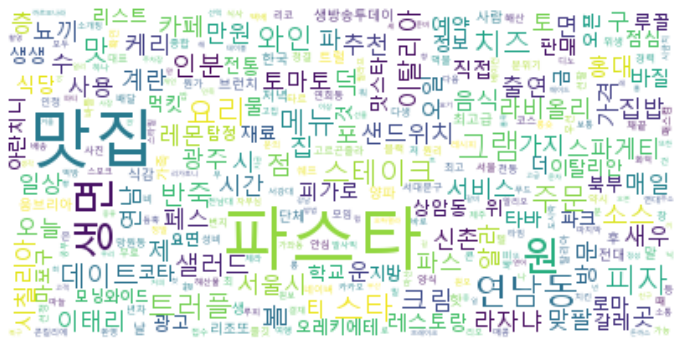

In [162]:
pasta_wc = WordCloud(max_font_size=40, background_color="white", max_words=1000,
               font_path="C:\\Windows\\Fonts\\malgun.ttf").generate_from_frequencies(dict(rank_text))

plt.figure(figsize=(12,12))
plt.imshow(pasta_wc, interpolation="bilinear")
plt.axis("off")

## 전처리1 
- Contents 특수기호 및 문자 제거
- Tags #을 제외한 특수 기호 제거

In [163]:
pasta_2 = pasta2.copy()

In [164]:
pasta_2.head()

,UserId,Contents,Tags,Like
0,stb.0709.72yq,@chef_seokdeok안녕하세요. 이태리에서 🏫요리학교를 나와 지금까지 이태리 ...,"['#파스타', '#생면파스타', '#연남맛집', '#연남동맛집', '#홍대맛집',...",153
1,jo.a_menu,#조아_메뉴주말엔 왠지 요리가 더 하기 싫어지는 마음...그냥 주말엔 편하게 대-충...,"['#조아_메뉴주말엔', '#식단일기', '#다이어트식단레시피-']",1641
2,___foodtour,"젤리 동파육에 홈런볼 탕수육,, 대학로 신상 맛집 떳어요. #혜화#해피니스이름처럼 ...","['#혜화', '#해피니스이름처럼', '#투어_혜화']",66
3,zeoanaoa__.vva,@chef_seokdeok안녕하세요. 이태리에서 🏫요리학교를 나와 지금까지 이태리 ...,"['#파스타', '#생면파스타', '#연남맛집', '#연남동맛집', '#홍대맛집',...",138
4,mukggiri,세상에서 제일 맛있는 별이다.넘나 귀욤뽀짝한 별이 미트볼 위에서웃고있어용;; 부드러...,"['#헤이죠지', '#먹끼리_마포', '#홍대맛집', '#홍대맛집추천', '#홍대파...",738


In [165]:
pasta_2["Contents"] = pasta_2["Contents"].str.replace(pat=r'[^\w]', repl=r' ', regex=True)
pasta_2["Tags"] = pasta_2["Tags"].str.strip("]['")
pasta_2["Tags"] = pasta_2["Tags"].str.replace("'", repl=r"", regex=True)

In [166]:
pasta_2.head()

,UserId,Contents,Tags,Like
0,stb.0709.72yq,chef_seokdeok안녕하세요 이태리에서 요리학교를 나와 지금까지 이태리 ...,"#파스타, #생면파스타, #연남맛집, #연남동맛집, #홍대맛집, #연트럴파크맛집, ...",153
1,jo.a_menu,조아_메뉴주말엔 왠지 요리가 더 하기 싫어지는 마음 그냥 주말엔 편하게 대 충...,"#조아_메뉴주말엔, #식단일기, #다이어트식단레시피-",1641
2,___foodtour,젤리 동파육에 홈런볼 탕수육 대학로 신상 맛집 떳어요 혜화 해피니스이름처럼 ...,"#혜화, #해피니스이름처럼, #투어_혜화",66
3,zeoanaoa__.vva,chef_seokdeok안녕하세요 이태리에서 요리학교를 나와 지금까지 이태리 ...,"#파스타, #생면파스타, #연남맛집, #연남동맛집, #홍대맛집, #연트럴파크맛집, ...",138
4,mukggiri,세상에서 제일 맛있는 별이다 넘나 귀욤뽀짝한 별이 미트볼 위에서웃고있어용 부드러...,"#헤이죠지, #먹끼리_마포, #홍대맛집, #홍대맛집추천, #홍대파스타, #홍대파스타...",738


## 전처리2
- Contents에서 연관성 높은 키워드 포함된 행 추출
- Like 정규화 및 평균 이하 제거

##### 연관성 키워드 포함 행 추출

In [167]:
pasta_2 = pasta_2[pasta_2["Contents"].str.contains(r"협찬|광고|추천|맛집|그램|이태리|이탈리아|파스타")]

In [168]:
pasta_2.reset_index(drop=True, inplace=True)

In [169]:
like = pasta_2["Like"].copy()

In [170]:
like = pd.DataFrame(like)

##### Like 정규화

In [171]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxcaler객체 생성
scaler = MinMaxScaler()

# MinMaxScaler 로 데이터 셋 변환 .fit() 과 .transform() 호출.  
scaler.fit(like)
like_scaled = scaler.transform(like)

# transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
Like_scaled = pd.DataFrame(data=like_scaled)

In [172]:
Like_scaled.columns=["like_scale"]
Like_scaled.head()

,like_scale
0,0.058756
1,0.630184
2,0.025346
3,0.052995
4,0.283410


In [173]:
pasta_2.drop(["Like"],axis=1, inplace=True)

In [174]:
pasta_scaled2 = pd.concat([pasta_2, Like_scaled],axis=1)
pasta_scaled2.head()

,UserId,Contents,Tags,like_scale
0,stb.0709.72yq,chef_seokdeok안녕하세요 이태리에서 요리학교를 나와 지금까지 이태리 ...,"#파스타, #생면파스타, #연남맛집, #연남동맛집, #홍대맛집, #연트럴파크맛집, ...",0.058756
1,jo.a_menu,조아_메뉴주말엔 왠지 요리가 더 하기 싫어지는 마음 그냥 주말엔 편하게 대 충...,"#조아_메뉴주말엔, #식단일기, #다이어트식단레시피-",0.630184
2,___foodtour,젤리 동파육에 홈런볼 탕수육 대학로 신상 맛집 떳어요 혜화 해피니스이름처럼 ...,"#혜화, #해피니스이름처럼, #투어_혜화",0.025346
3,zeoanaoa__.vva,chef_seokdeok안녕하세요 이태리에서 요리학교를 나와 지금까지 이태리 ...,"#파스타, #생면파스타, #연남맛집, #연남동맛집, #홍대맛집, #연트럴파크맛집, ...",0.052995
4,mukggiri,세상에서 제일 맛있는 별이다 넘나 귀욤뽀짝한 별이 미트볼 위에서웃고있어용 부드러...,"#헤이죠지, #먹끼리_마포, #홍대맛집, #홍대맛집추천, #홍대파스타, #홍대파스타...",0.283410


In [175]:
pasta_scaled2

,UserId,Contents,Tags,like_scale
0,stb.0709.72yq,chef_seokdeok안녕하세요 이태리에서 요리학교를 나와 지금까지 이태리 ...,"#파스타, #생면파스타, #연남맛집, #연남동맛집, #홍대맛집, #연트럴파크맛집, ...",0.058756
1,jo.a_menu,조아_메뉴주말엔 왠지 요리가 더 하기 싫어지는 마음 그냥 주말엔 편하게 대 충...,"#조아_메뉴주말엔, #식단일기, #다이어트식단레시피-",0.630184
2,___foodtour,젤리 동파육에 홈런볼 탕수육 대학로 신상 맛집 떳어요 혜화 해피니스이름처럼 ...,"#혜화, #해피니스이름처럼, #투어_혜화",0.025346
3,zeoanaoa__.vva,chef_seokdeok안녕하세요 이태리에서 요리학교를 나와 지금까지 이태리 ...,"#파스타, #생면파스타, #연남맛집, #연남동맛집, #홍대맛집, #연트럴파크맛집, ...",0.052995
4,mukggiri,세상에서 제일 맛있는 별이다 넘나 귀욤뽀짝한 별이 미트볼 위에서웃고있어용 부드러...,"#헤이죠지, #먹끼리_마포, #홍대맛집, #홍대맛집추천, #홍대파스타, #홍대파스타...",0.283410
...,...,...,...,...
813,chef_seokdeok,안녕하세요 이탈리아를 사랑하는 이석덕셰프입니다 1차배송 해 드렸습니다 거래처 셰프님...,"#생면파스타, #이석덕생면파스타, #카페, #파스타, #피자, #파스타면판매, #생...",0.014209
814,meraki_coffee_bistro,새해에는 내 사람들에게정말 좋은 일들만 가득 생겼으면 좋겠고무엇보다 몸과 마음이 ...,"#메라키, #원광대학교, #전북대학교, #익산병원, #...",0.013825
815,j.p_portuga,나의 인생 맛집 파스타편거제 가면 꼭 들르는 집 사실 여기 파스타가 먹고 싶어...,"#가족외식, #나만의미슐랭3스타, #최애음식, #파스타",0.003840
816,mjjh1205,저번에 완전 돌덩이같은 호밀빵 됐던 바나나머핀 재도전 설탕이랑 베이킹파우더 추가...,"#도시락, #남편도시락, #한식, #집밥, #간식, #샐러드, #미국에서한식먹기, ...",0.054916


In [176]:
avg = Like_scaled.sum()/len(Like_scaled)
avg

like_scale    0.029181
dtype: float64

In [177]:
pasta_scaled_avg2 = pasta_scaled2[pasta_scaled2["like_scale"]>0.029181]

In [178]:
pasta_scaled_avg2.reset_index(drop=True, inplace=True)

In [179]:
pasta_scaled_avg2       #248개

,UserId,Contents,Tags,like_scale
0,stb.0709.72yq,chef_seokdeok안녕하세요 이태리에서 요리학교를 나와 지금까지 이태리 ...,"#파스타, #생면파스타, #연남맛집, #연남동맛집, #홍대맛집, #연트럴파크맛집, ...",0.058756
1,jo.a_menu,조아_메뉴주말엔 왠지 요리가 더 하기 싫어지는 마음 그냥 주말엔 편하게 대 충...,"#조아_메뉴주말엔, #식단일기, #다이어트식단레시피-",0.630184
2,zeoanaoa__.vva,chef_seokdeok안녕하세요 이태리에서 요리학교를 나와 지금까지 이태리 ...,"#파스타, #생면파스타, #연남맛집, #연남동맛집, #홍대맛집, #연트럴파크맛집, ...",0.052995
3,mukggiri,세상에서 제일 맛있는 별이다 넘나 귀욤뽀짝한 별이 미트볼 위에서웃고있어용 부드러...,"#헤이죠지, #먹끼리_마포, #홍대맛집, #홍대맛집추천, #홍대파스타, #홍대파스타...",0.283410
4,hcncncz09ds,chef_seokdeok안녕하세요 이태리에서 요리학교를 나와 지금까지 이태리 ...,"#파스타, #생면파스타, #연남맛집, #연남동맛집, #홍대맛집, #연트럴파크맛집, ...",0.053379
...,...,...,...,...
242,jsuwbams,파스타가 4 900원 가성비 미쳐버린 이탈리아 전통 생면파스타 맛집말도 안되는 착...,"#연남동맛집, #신촌맛집, #이대맛집, #생면파스타, #파스타, #파스타바, #연트...",0.054916
243,fooddd123v,잠실에서 급 방문한 파스타 집시간대가 애매해서 브레이크타임 안걸리는 곳을 찾아 들어...,"#잠실, #잠실맛집, #파스타집이야, #파스타, #필라프, #점심, #점메추, #맛...",0.054916
244,basldkfj,chef_seokdeok안녕하세요 이태리에서 요리학교를 나와 지금까지 이태리 ...,"#파스타, #생면파스타, #연남맛집, #연남동맛집, #홍대맛집, #연트럴파크맛집, ...",0.054531
245,mjjh1205,저번에 완전 돌덩이같은 호밀빵 됐던 바나나머핀 재도전 설탕이랑 베이킹파우더 추가...,"#도시락, #남편도시락, #한식, #집밥, #간식, #샐러드, #미국에서한식먹기, ...",0.054916


## 햄버거 1000개

In [192]:
hbg = pd.read_csv("F:/Acorn/final_project/data/result_hbg.csv", index_col = 0)
hbg.head()

,0,1,2,3
0,moonroof2,(버거킹)신메뉴 치킨킹/치킨킹blt....맛평가/칼로리=>https://m.blog...,"['#맛스타그램', '#먹스타그램', '#버거스타그램', '#햄버거스타그램', '#...",32
1,meogxplorer,🔎#왓더버거 🔍불향 가득한 수제 버거 맛집 왓더버거!인테리어 깔끔하고 예쁘다! #고...,"['#왓더버거', '#고기듬뿍셧더버거', '#직화통새우쉬림프버거', '#오리지널감자...",67
2,moonroof2,(슈퍼두퍼)트러플버거....맛평가/칼로리=>https://m.blog.naver.c...,"['#치킨', '#치킨버거', '#클래식치킨샌드위치', '#버거', '#버거집', ...",15
3,e.a.t.ahnya,"#themeltingpot @シャロスキル*・Avocado Burger（₩14,000...","['#themeltingpot', '#グルメ', '#グルメ好きな人と繋がりたい',...",1069
4,younghwa_cha,"오늘은 가볍게 백세주 두병 클리어, 제가 어떤 안주에 마셨을까요?#짐작은가시겠지만바...","['#짐작은가시겠지만바로그거', '#국순당', '#백세주', '#오늘의', '#안주...",303


In [193]:
hbg.columns = ["UserId", "Contents", "Tags", "Like"]
hbg.head()

,UserId,Contents,Tags,Like
0,moonroof2,(버거킹)신메뉴 치킨킹/치킨킹blt....맛평가/칼로리=>https://m.blog...,"['#맛스타그램', '#먹스타그램', '#버거스타그램', '#햄버거스타그램', '#...",32
1,meogxplorer,🔎#왓더버거 🔍불향 가득한 수제 버거 맛집 왓더버거!인테리어 깔끔하고 예쁘다! #고...,"['#왓더버거', '#고기듬뿍셧더버거', '#직화통새우쉬림프버거', '#오리지널감자...",67
2,moonroof2,(슈퍼두퍼)트러플버거....맛평가/칼로리=>https://m.blog.naver.c...,"['#치킨', '#치킨버거', '#클래식치킨샌드위치', '#버거', '#버거집', ...",15
3,e.a.t.ahnya,"#themeltingpot @シャロスキル*・Avocado Burger（₩14,000...","['#themeltingpot', '#グルメ', '#グルメ好きな人と繋がりたい',...",1069
4,younghwa_cha,"오늘은 가볍게 백세주 두병 클리어, 제가 어떤 안주에 마셨을까요?#짐작은가시겠지만바...","['#짐작은가시겠지만바로그거', '#국순당', '#백세주', '#오늘의', '#안주...",303


In [197]:
hbg

,UserId,Contents,Tags,Like
0,moonroof2,(버거킹)신메뉴 치킨킹/치킨킹blt....맛평가/칼로리=>https://m.blog...,"['#맛스타그램', '#먹스타그램', '#버거스타그램', '#햄버거스타그램', '#...",32
1,meogxplorer,🔎#왓더버거 🔍불향 가득한 수제 버거 맛집 왓더버거!인테리어 깔끔하고 예쁘다! #고...,"['#왓더버거', '#고기듬뿍셧더버거', '#직화통새우쉬림프버거', '#오리지널감자...",67
2,moonroof2,(슈퍼두퍼)트러플버거....맛평가/칼로리=>https://m.blog.naver.c...,"['#치킨', '#치킨버거', '#클래식치킨샌드위치', '#버거', '#버거집', ...",15
3,e.a.t.ahnya,"#themeltingpot @シャロスキル*・Avocado Burger（₩14,000...","['#themeltingpot', '#グルメ', '#グルメ好きな人と繋がりたい',...",1069
4,younghwa_cha,"오늘은 가볍게 백세주 두병 클리어, 제가 어떤 안주에 마셨을까요?#짐작은가시겠지만바...","['#짐작은가시겠지만바로그거', '#국순당', '#백세주', '#오늘의', '#안주...",303
...,...,...,...,...
991,tystar0982,배고프다 야식 고고~!🍔🍟버거 버거 버거후렌치후라이밀크쉐이크먹었으니 자야지오늘도 고...,"['#프랭크버거', '#쉬림프', '#쉬림프버거', '#머쉬룸버거', '#밀크쉐이크...",22
992,burgerily_delish,📍@shimotsuki_burger 》🍔 _#burgerily #burgerilyd...,"['#burgerily', '#burgerilydelish', '#burger', ...",62
993,food_dessert_review,#햄버거 🍔수제햄버거 느낌 낭낭한 다운타우너🍔✔️ 구입처 : 다운타우너 안국✔️ 가...,"['#햄버거', '#햄버거맛집', '#안국맛집', '#다운타우너', '#다운타우너안국']",67
994,hyom_nyom,버거베어 냐미,[],11


In [5]:
## 워드 클라우드 생성을 위한 패키지
from wordcloud import WordCloud
## 워드클라우드 모양을 변형시키고자 하는 이미지 활용에 사용 패키지
from PIL import Image
## 그래프 출력 패키지
import matplotlib.pyplot as plt
## 수치 연산 패키지
import numpy as np
## 데이터 핸들링
import pandas as pd

In [207]:
hbg["Contents"].fillna("x", inplace=True)

In [208]:
hbg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 0 to 995
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   UserId    996 non-null    object
 1   Contents  996 non-null    object
 2   Tags      996 non-null    object
 3   Like      996 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 71.2+ KB


In [209]:
import time
from tqdm import tqdm_notebook

content_all = ''
for i in tqdm_notebook(range(len(hbg["Contents"]))):
    content_all = content_all + ' ' + hbg["Contents"].loc[i]

C:\Users\acorn\AppData\Local\Temp\ipykernel_10164\1113971449.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(hbg["Contents"]))):


  0%|          | 0/996 [00:00<?, ?it/s]

In [210]:
import re
content_all = re.sub('[^ㄱ-ㅣ가-힣 ]',"",content_all)
content_all

' 버거킹신메뉴 치킨킹치킨킹맛평가칼로리맛스타그램 먹스타그램 버거스타그램 햄버거스타그램 버거 버거집 버거맛집 햄버거 햄버거집   버거킹버거킹버거 버거킹햄버거 버거킹신메뉴 버거킹신상 버거킹신제품 치킨 치킨버거 치킨킹 치킨킹버거 치킨킹 버거킹치킨킹 왓더버거 불향 가득한 수제 버거 맛집 왓더버거인테리어 깔끔하고 예쁘다 고기듬뿍셧더버거 패티베이컨에 캐러맬라이징한 양파 가득해서 달달함 불고기버거의 고급버전 먹는 것 같다직화통새우쉬림프버거 와사마요 소스에 새우패티직화통새우로 새우파티 수제 소스 뿌려먹어도 너무 잘어울린다오리지널감자튀김 담백함의 표본 감튀 소스가 세개나 있어서 골라먹는 재미가 있다오지치즈후라이 치즈 가득 달콤한 소스로 먹어본 오지치즈후라이 중 가장 달달하다메뉴는 맨 마지막 사진방문은  먹방탐험가 먹방탐험가인천 먹방탐험가수제버거 청라맛집 청라수제버거 수제버거 왓더버거인천청라점 새우버거 고기버거 햄버거 수제버거맛집 수제버거추천 슈퍼두퍼트러플버거맛평가칼로리치킨 치킨버거 클래식치킨샌드위치 버거 버거집 버거맛집 햄버거 햄버거집 햄버거맛집 수제버거 수제버거집 서울버거맛집 서울버거 서울버거집 서울버거맛집 서울햄버거 서울햄버거집 서울햄버거맛집 서울수제버거 서울수제버거맛집   슈퍼두퍼 슈퍼두퍼버거 슈퍼두퍼트러플버거 트러플버거                    샤로수길에 있는 수제버거집 더멜팅팟 점원분이 추천해주신  와   를 먹어봤는데 둘 다 훌륭했어요부드러운 식감의 햄버거번과 존재감있는 패티가 특히 맛있었고 채소토핑도 식감이 살아있어서 좋았어요                      서울맛집 샤로수길맛집 햄버거 수제버거 더멜팅팟  오늘은 가볍게 백세주 두병 클리어 제가 어떤 안주에 마셨을까요짐작은가시겠지만바로그거국순당백세주오늘의 안주참치 참치회 고기 소고기 삼겹살 조개구이 초밥 스시 아구찜 해물탕 치킨 햄버거 떡볶이이 중 하나 통새우폭탄버거먹시인입 속을 가득 채우는 탱글한 통새우버거다직화로 구운 새우가 잔뜩 들어간 인생 수제버거톡 쏘는 와사비소스까지 환상의 조화를 자랑한다바

In [211]:
from konlpy.tag import Okt
okt = Okt()
nouns_txt = okt.nouns(content_all)
nouns_txt

['버거킹',
 '메뉴',
 '치킨',
 '킹',
 '치킨',
 '킹맛',
 '평가',
 '칼로리',
 '맛스타',
 '그램',
 '스타',
 '그램',
 '버거',
 '스타',
 '그램',
 '햄버거',
 '스타',
 '그램',
 '버거',
 '버거',
 '집',
 '버거',
 '맛집',
 '햄버거',
 '햄버거',
 '집',
 '버거킹',
 '버거킹',
 '버거',
 '버거킹',
 '햄버거',
 '버거킹',
 '메뉴',
 '버거킹',
 '신상',
 '버거킹',
 '신제품',
 '치킨',
 '치킨',
 '버거',
 '치킨',
 '킹',
 '치킨',
 '킹',
 '버거',
 '치킨',
 '킹',
 '버거킹',
 '치킨',
 '킹',
 '왓더',
 '버거',
 '불향',
 '수제',
 '버거',
 '맛집',
 '왓더',
 '버거',
 '인테리어',
 '듬뿍',
 '셧더',
 '버거',
 '패티',
 '베이컨',
 '캐러맬',
 '이징',
 '양파',
 '달달',
 '함',
 '불고기',
 '버거',
 '고급',
 '버전',
 '것',
 '직',
 '화통',
 '새우',
 '쉬',
 '림프',
 '버거',
 '사마요',
 '소스',
 '새우',
 '패티',
 '직',
 '화통',
 '새우',
 '새우',
 '파티',
 '수제',
 '소스',
 '널',
 '감자',
 '튀김',
 '표본',
 '감',
 '소스',
 '개',
 '재미',
 '치즈',
 '후',
 '라이',
 '치즈',
 '가득',
 '소스',
 '오지',
 '치즈',
 '후',
 '라이',
 '중',
 '가장',
 '달달',
 '메뉴',
 '맨',
 '마지막',
 '사진',
 '방문',
 '먹방',
 '탐험가',
 '먹방',
 '탐험가',
 '인천',
 '먹방',
 '탐험가',
 '버거',
 '청라',
 '맛집',
 '청라',
 '수제',
 '버거',
 '수제',
 '버거',
 '왓더',
 '버거',
 '천청',
 '점',
 '새우',
 '버거',
 '고기',
 '버거',
 '햄버거',
 '수제',


In [212]:
from collections import Counter
count = Counter(nouns_txt)
count
rank_text = count.most_common()
rank_text

[('버거', 2006),
 ('맛집', 1402),
 ('햄버거', 1352),
 ('수제', 646),
 ('그램', 511),
 ('스타', 466),
 ('패티', 373),
 ('주문', 265),
 ('맛', 242),
 ('추천', 239),
 ('치킨', 238),
 ('잠실', 230),
 ('오늘', 152),
 ('더', 147),
 ('집', 142),
 ('메뉴', 135),
 ('번', 128),
 ('곳', 128),
 ('단체', 126),
 ('새우', 123),
 ('튀김', 121),
 ('일상', 120),
 ('소스', 116),
 ('감자', 115),
 ('데이트', 115),
 ('맞팔', 114),
 ('치즈', 113),
 ('점심', 111),
 ('점', 104),
 ('육즙', 103),
 ('소고기', 98),
 ('간식', 98),
 ('맛스타', 96),
 ('서울', 96),
 ('버거킹', 93),
 ('수', 89),
 ('먹방', 87),
 ('포항', 87),
 ('향', 86),
 ('야채', 86),
 ('카페', 83),
 ('길', 79),
 ('직접', 79),
 ('아이', 79),
 ('감', 77),
 ('꼭', 77),
 ('치즈버거', 77),
 ('사용', 76),
 ('주말', 75),
 ('킹', 73),
 ('매일', 73),
 ('세트', 73),
 ('핫', 72),
 ('롯데', 71),
 ('버터', 70),
 ('식감', 68),
 ('미국', 68),
 ('빵', 67),
 ('롯데리아', 67),
 ('때', 66),
 ('모든', 64),
 ('배달', 64),
 ('월드', 63),
 ('것', 62),
 ('브리', 62),
 ('소통', 62),
 ('맥도날드', 62),
 ('시간', 60),
 ('폭', 60),
 ('전문점', 59),
 ('여행', 59),
 ('선팔', 58),
 ('음식', 57),
 ('리얼', 57),
 ('송파', 57

In [213]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from konlpy.tag import Okt
from konlpy.corpus import kolaw
import nltk
from wordcloud import WordCloud

(-0.5, 399.5, 199.5, -0.5)

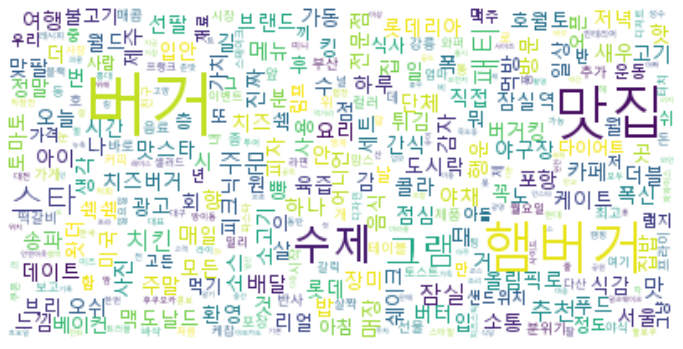

In [214]:
pasta_wc = WordCloud(max_font_size=40, background_color="white", max_words=1000,
               font_path="C:\\Windows\\Fonts\\malgun.ttf").generate_from_frequencies(dict(rank_text))

plt.figure(figsize=(12,12))
plt.imshow(pasta_wc, interpolation="bilinear")
plt.axis("off")

## 전처리1 
- Contents 특수기호 및 문자 제거
- Tags #을 제외한 특수 기호 제거

In [219]:
hbg1 = hbg.copy()

In [220]:
hbg1.head()

,UserId,Contents,Tags,Like
0,moonroof2,(버거킹)신메뉴 치킨킹/치킨킹blt....맛평가/칼로리=>https://m.blog...,"['#맛스타그램', '#먹스타그램', '#버거스타그램', '#햄버거스타그램', '#...",32
1,meogxplorer,🔎#왓더버거 🔍불향 가득한 수제 버거 맛집 왓더버거!인테리어 깔끔하고 예쁘다! #고...,"['#왓더버거', '#고기듬뿍셧더버거', '#직화통새우쉬림프버거', '#오리지널감자...",67
2,moonroof2,(슈퍼두퍼)트러플버거....맛평가/칼로리=>https://m.blog.naver.c...,"['#치킨', '#치킨버거', '#클래식치킨샌드위치', '#버거', '#버거집', ...",15
3,e.a.t.ahnya,"#themeltingpot @シャロスキル*・Avocado Burger（₩14,000...","['#themeltingpot', '#グルメ', '#グルメ好きな人と繋がりたい',...",1069
4,younghwa_cha,"오늘은 가볍게 백세주 두병 클리어, 제가 어떤 안주에 마셨을까요?#짐작은가시겠지만바...","['#짐작은가시겠지만바로그거', '#국순당', '#백세주', '#오늘의', '#안주...",303


In [221]:
hbg1["Contents"] = hbg1["Contents"].str.replace(pat=r'[^\w]', repl=r' ', regex=True)
hbg1["Tags"] = hbg1["Tags"].str.strip("]['")
hbg1["Tags"] = hbg1["Tags"].str.replace("'", repl=r"", regex=True)

In [222]:
hbg1.head()

,UserId,Contents,Tags,Like
0,moonroof2,버거킹 신메뉴 치킨킹 치킨킹blt 맛평가 칼로리 https m blog...,"#맛스타그램, #먹스타그램, #버거스타그램, #햄버거스타그램, #버거, #버거집, ...",32
1,meogxplorer,왓더버거 불향 가득한 수제 버거 맛집 왓더버거 인테리어 깔끔하고 예쁘다 고...,"#왓더버거, #고기듬뿍셧더버거, #직화통새우쉬림프버거, #오리지널감자튀김, #오지치...",67
2,moonroof2,슈퍼두퍼 트러플버거 맛평가 칼로리 https m blog naver c...,"#치킨, #치킨버거, #클래식치킨샌드위치, #버거, #버거집, #버거맛집, #햄버거...",15
3,e.a.t.ahnya,themeltingpot シャロスキル Avocado Burger 14 000...,"#themeltingpot, #グルメ, #グルメ好きな人と繋がりたい, #韓国グルメ...",1069
4,younghwa_cha,오늘은 가볍게 백세주 두병 클리어 제가 어떤 안주에 마셨을까요 짐작은가시겠지만바...,"#짐작은가시겠지만바로그거, #국순당, #백세주, #오늘의, #안주, #참치, #참치...",303


## 전처리2
- Contents에서 연관성 높은 키워드 포함된 행 추출
- Like 정규화 및 평균 이하 제거

##### 연관성 키워드 포함 행 추출

In [223]:
hbg1 = hbg1[hbg1["Contents"].str.contains(r"협찬|광고|추천|맛집|그램|버거")]

In [224]:
hbg1.reset_index(drop=True, inplace=True)

In [225]:
like = hbg1["Like"].copy()

In [226]:
like = pd.DataFrame(like)

##### Like 정규화

In [227]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxcaler객체 생성
scaler = MinMaxScaler()

# MinMaxScaler 로 데이터 셋 변환 .fit() 과 .transform() 호출.  
scaler.fit(like)
like_scaled = scaler.transform(like)

# transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
Like_scaled = pd.DataFrame(data=like_scaled)

In [228]:
Like_scaled.columns=["like_scale"]
Like_scaled.head()

,like_scale
0,0.006635
1,0.013892
2,0.003110
3,0.221646
4,0.062824


In [229]:
hbg1.drop(["Like"],axis=1, inplace=True)

In [230]:
hbg_scaled = pd.concat([hbg1, Like_scaled],axis=1)
hbg_scaled.head()

,UserId,Contents,Tags,like_scale
0,moonroof2,버거킹 신메뉴 치킨킹 치킨킹blt 맛평가 칼로리 https m blog...,"#맛스타그램, #먹스타그램, #버거스타그램, #햄버거스타그램, #버거, #버거집, ...",0.006635
1,meogxplorer,왓더버거 불향 가득한 수제 버거 맛집 왓더버거 인테리어 깔끔하고 예쁘다 고...,"#왓더버거, #고기듬뿍셧더버거, #직화통새우쉬림프버거, #오리지널감자튀김, #오지치...",0.013892
2,moonroof2,슈퍼두퍼 트러플버거 맛평가 칼로리 https m blog naver c...,"#치킨, #치킨버거, #클래식치킨샌드위치, #버거, #버거집, #버거맛집, #햄버거...",0.003110
3,e.a.t.ahnya,themeltingpot シャロスキル Avocado Burger 14 000...,"#themeltingpot, #グルメ, #グルメ好きな人と繋がりたい, #韓国グルメ...",0.221646
4,younghwa_cha,오늘은 가볍게 백세주 두병 클리어 제가 어떤 안주에 마셨을까요 짐작은가시겠지만바...,"#짐작은가시겠지만바로그거, #국순당, #백세주, #오늘의, #안주, #참치, #참치...",0.062824


In [231]:
hbg_scaled

,UserId,Contents,Tags,like_scale
0,moonroof2,버거킹 신메뉴 치킨킹 치킨킹blt 맛평가 칼로리 https m blog...,"#맛스타그램, #먹스타그램, #버거스타그램, #햄버거스타그램, #버거, #버거집, ...",0.006635
1,meogxplorer,왓더버거 불향 가득한 수제 버거 맛집 왓더버거 인테리어 깔끔하고 예쁘다 고...,"#왓더버거, #고기듬뿍셧더버거, #직화통새우쉬림프버거, #오리지널감자튀김, #오지치...",0.013892
2,moonroof2,슈퍼두퍼 트러플버거 맛평가 칼로리 https m blog naver c...,"#치킨, #치킨버거, #클래식치킨샌드위치, #버거, #버거집, #버거맛집, #햄버거...",0.003110
3,e.a.t.ahnya,themeltingpot シャロスキル Avocado Burger 14 000...,"#themeltingpot, #グルメ, #グルメ好きな人と繋がりたい, #韓国グルメ...",0.221646
4,younghwa_cha,오늘은 가볍게 백세주 두병 클리어 제가 어떤 안주에 마셨을까요 짐작은가시겠지만바...,"#짐작은가시겠지만바로그거, #국순당, #백세주, #오늘의, #안주, #참치, #참치...",0.062824
...,...,...,...,...
877,tystar0982,배고프다 야식 고고 버거 버거 버거후렌치후라이밀크쉐이크먹었으니 자야지오늘도 고...,"#프랭크버거, #쉬림프, #쉬림프버거, #머쉬룸버거, #밀크쉐이크, #후렌치후라이,...",0.004561
878,burgerily_delish,shimotsuki_burger _ burgerily burgerilyd...,"#burgerily, #burgerilydelish, #burger, #burger...",0.012855
879,food_dessert_review,햄버거 수제햄버거 느낌 낭낭한 다운타우너 구입처 다운타우너 안국 가...,"#햄버거, #햄버거맛집, #안국맛집, #다운타우너, #다운타우너안국",0.013892
880,hyom_nyom,버거베어 냐미,,0.002281


In [232]:
avg = Like_scaled.sum()/len(Like_scaled)
avg

like_scale    0.018708
dtype: float64

In [233]:
hbg_scaled_avg = hbg_scaled[hbg_scaled["like_scale"]>0.018708]

In [234]:
hbg_scaled_avg.reset_index(drop=True, inplace=True)

In [235]:
hbg_scaled_avg       #126개

,UserId,Contents,Tags,like_scale
0,e.a.t.ahnya,themeltingpot シャロスキル Avocado Burger 14 000...,"#themeltingpot, #グルメ, #グルメ好きな人と繋がりたい, #韓国グルメ...",0.221646
1,younghwa_cha,오늘은 가볍게 백세주 두병 클리어 제가 어떤 안주에 마셨을까요 짐작은가시겠지만바...,"#짐작은가시겠지만바로그거, #국순당, #백세주, #오늘의, #안주, #참치, #참치...",0.062824
2,mukseein,통새우폭탄버거 먹시인입 속을 가득 채우는 탱글한 ...,"#왓더버거📍, #직화통새우버거, #셧더버거, #햄버거맛집, #새우버거, #버거맛집,...",0.882438
3,265mm__,맘스터치 알바생 오열 ㅋㅋㅋ 토깽이가 운영하는 페이지 humor _ rabbit...,"#맘터, #햄버거, #해병대, #알바, #눈물, #귀신잡는해병, #알바잡는해병",0.189094
4,min_happy.matzip,맹구의 성수 패티패티 탐방 성수동맛집 수제버거 버거맛집 성수맛집 저장각 ...,"#성수동맛집, #수제버거, #버거맛집, #성수맛집, #저장각, #성수, #성수동핫플...",0.714078
...,...,...,...,...
121,bro_burger_,머쉬룸 폭탄 트러플 머쉬룸버거 이렇게 아낌없이 들어간 머쉬룸버거오직 브로버거에...,"#트러플, #브로버거, #수제버거, #수제버거맛집, #햄버거, #햄버거맛집, #햄버...",0.049554
122,hyob_muk,육즙 줄줄 흘러내리는 명품패티로 유명한 톰바그 협찬 비주얼부터 맛까지 어나더레벨...,"#톰바그, #운정역맛집, #햄버거맛집, #수제버거, #수제버거맛집, #파주맛집, #...",0.230562
123,burgerily_delish,hotbunnydiner _ burgerily burgerilydelish...,"#burgerily, #burgerilydelish, #burger, #burger...",0.019697
124,sungjong_kang,첫줄총대장님과 함께 미스터샤크 철산동 나라참치 뭉쳐야 본다 저녁식사...,"#첫줄총대장님과, #미스터샤크, #철산동, #나라참치, #뭉쳐야, #본다, #저녁식...",0.029028


In [3]:
# 인스타그램 접속
driver=webdriver.Chrome("chromedriver")
driver.get("https://www.instagram.com")
time.sleep(5)

# 로그인
import pyperclip
pyperclip.copy("ssossommiing")
driver.find_element(By.NAME, "username").send_keys(Keys.CONTROL, "v")
pyperclip.copy("123thals")
driver.find_element(By.NAME, "password").send_keys(Keys.CONTROL, "v")
driver.find_element(By.NAME, "password").send_keys(Keys.ENTER)
time.sleep(3)

# 정보 저장(나중으로 바꾸기)
save = WebDriverWait(driver,timeout=5).until(EC.presence_of_element_located((By.CLASS_NAME,"_ac8f")))
save.find_element(By.CLASS_NAME,"_acao").send_keys(Keys.ENTER)  
                                                                            
# 알림 설정
ar = WebDriverWait(driver,timeout=5).until(EC.presence_of_element_located((By.CLASS_NAME,"_a9_1")))
ar.send_keys(Keys.ENTER)

TimeoutException: Message: 
Stacktrace:
Backtrace:
	(No symbol) [0x0040F243]
	(No symbol) [0x00397FD1]
	(No symbol) [0x0028D04D]
	(No symbol) [0x002BC0B0]
	(No symbol) [0x002BC22B]
	(No symbol) [0x002EE612]
	(No symbol) [0x002D85D4]
	(No symbol) [0x002EC9EB]
	(No symbol) [0x002D8386]
	(No symbol) [0x002B163C]
	(No symbol) [0x002B269D]
	GetHandleVerifier [0x006A9A22+2655074]
	GetHandleVerifier [0x0069CA24+2601828]
	GetHandleVerifier [0x004B8C0A+619850]
	GetHandleVerifier [0x004B7830+614768]
	(No symbol) [0x003A05FC]
	(No symbol) [0x003A5968]
	(No symbol) [0x003A5A55]
	(No symbol) [0x003B051B]
	BaseThreadInitThunk [0x756800F9+25]
	RtlGetAppContainerNamedObjectPath [0x77807BBE+286]
	RtlGetAppContainerNamedObjectPath [0x77807B8E+238]


In [ ]:
# 프로필로 들어가기
driver.find_element(By.CLASS_NAME, "_aaqt").click()

time.sleep(3)

# 게시물, 팔로워, 팔로우
info = driver.find_elements(By.CLASS_NAME,"xl565be")
num=[]
post = []
follower = []
follow = []
for i in info:
    inf = i.text
    inff = re.findall("\S+",inf)
    num.append((inff[1]))
    
time.sleep(8)

post.append(num[0])
follower.append(num[1])
follow.append(num[2])

In [4]:
# 게시물, 팔로워, 팔로우

def searching(user):
    url = 'https://www.instagram.com/'+user
    return url

id = pasta["UserId"].copy()

for i in range(len(id)):
    url= searching(id[i])
    driver.get(url)
    time.sleep(5)

    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')

    info = soup.select('ul.xieb3on> li')

    post = info[0].find("span").get_text()
    follower = info[1].find("span").get_text()
    follow = info[2].find("span").get_text()
        
info_list = []

NameError: name 'pasta' is not defined

In [57]:
id = pasta["UserId"].copy()

In [58]:
searching(id)

0           https://www.instagram.com/wonyyday_
1           https://www.instagram.com/jmpsehanx
2           https://www.instagram.com/jo.a_menu
3        https://www.instagram.com/mari_mukkkkk
4       https://www.instagram.com/yyoasdmfk0214
                         ...                   
992        https://www.instagram.com/dalcongsfm
993           https://www.instagram.com/viudnie
994      https://www.instagram.com/hwangdayun71
995    https://www.instagram.com/myfoodrecords_
996            https://www.instagram.com/ltl0yl
Name: UserId, Length: 997, dtype: object

In [84]:
info_list = []
def info(driver):
    for i in range(len(id)):
        url= searching(id[i])
        driver.get(url)
        time.sleep(5)

        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')

        info = soup.select('ul.xieb3on> li')

        post = info[0].find("span").get_text()
        follower = info[1].find("span").get_text()
        follow = info[2].find("span").get_text()
    
    

485
141
990


KeyboardInterrupt: 

In [ ]:
[<li class="xl565be x2pgyrj x1m39q7l x1uw6ca5">
 <div class="_aacl _aacp _aacu _aacx _aad6 _aade">게시물 
 <span class="_ac2a"><span>485</span></span></div></li>, 
 
 <li class="xl565be x2pgyrj x1m39q7l x1uw6ca5">
 <a class="x1i10hfl xjbqb8w x6umtig x1b1mbwd xaqea5y xav7gou x9f619 x1ypdohk xt0psk2 xe8uvvx xdj266r x11i5rnm xat24cr x1mh8g0r xexx8yu x4uap5 x18d9i69 xkhd6sd x16tdsg8 x1hl2dhg xggy1nq x1a2a7pz _a6hd" href="/wonyyday_/followers/" role="link" tabindex="0"><div class="_aacl _aacp _aacu _aacx _aad6 _aade">
 팔로워 <span class="_ac2a" title="4.3만">
 <span>4.3만</span></span></div></a></li>, 
 
 <li class="xl565be x2pgyrj x1m39q7l x1uw6ca5">
 <a class="x1i10hfl xjbqb8w x6umtig x1b1mbwd xaqea5y xav7gou x9f619 x1ypdohk xt0psk2 xe8uvvx xdj266r x11i5rnm xat24cr x1mh8g0r xexx8yu x4uap5 x18d9i69 xkhd6sd x16tdsg8 x1hl2dhg xggy1nq x1a2a7pz _a6hd" href="/wonyyday_/following/" role="link" tabindex="0"><div class="_aacl _aacp _aacu _aacx _aad6 _aade">
 팔로우 <span class="_ac2a">
 <span>1409</span></span></div></a></li>]